In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:/práce/firmy/cafe slavia/analysis/Coffee_house_data/data_clean/combined_sortiment.csv")

In [5]:
df.columns = ['plu', 'name', 'amount', 'value', 'date']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12504 entries, 0 to 12503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   plu     12504 non-null  int64  
 1   name    12504 non-null  object 
 2   amount  12504 non-null  float64
 3   value   12504 non-null  float64
 4   date    12504 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 488.6+ KB


In [7]:
df.head(5)

,plu,name,amount,value,date
0,5,Cuba libre,2.0,198.0,08.02.2023
1,6,Cuba libre - test,2.0,198.0,08.02.2023
2,29,Lotus cheesecake - 1ks,1.0,79.0,08.02.2023
3,35,"Royal Crown Cola 0,25l",2.0,98.0,09.02.2023
4,46,Chito tonic,1.0,49.0,09.02.2023


In [8]:
df2 = pd.read_csv("E:/práce/firmy/cafe slavia/analysis/Coffee_house_data/data_clean/cenikpokladny.csv",index_col = False, encoding="iso-8859-1", sep=";")

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PLU              999 non-null    int64  
 1   NORMA(50)        134 non-null    object 
 2   MJ(50)           134 non-null    object 
 3   PLU_NAZEV(50)    190 non-null    object 
 4   RASTR_CISLO      999 non-null    int64  
 5   RASTR_NAZEV(50)  191 non-null    object 
 6   OM_CISLO         999 non-null    int64  
 7   SC               999 non-null    float64
 8   PC               999 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


In [10]:
df2.head(5)

,PLU,NORMA(50),MJ(50),PLU_NAZEV(50),RASTR_CISLO,RASTR_NAZEV(50),OM_CISLO,SC,PC
0,1,NaN,NaN,Dýòové latté,18,Káva (10%),10,0.0,89
1,2,NaN,NaN,Ledová káva,18,Káva (10%),10,0.0,89
2,3,NaN,NaN,Mandlový flat white,18,Káva (10%),10,0.0,85
3,4,NaN,NaN,Mandlové latte,18,Káva (10%),10,0.0,79
4,5,NaN,NaN,Mandlové cappucino,18,Káva (10%),10,0.0,75


In [11]:
df_combined = pd.merge(df, df2, left_on='plu', right_on='PLU', how='left')
               

In [12]:
df_combined.rename(columns = {'RASTR_NAZEV(50)': 'rastr'})

,plu,name,amount,value,date,PLU,NORMA(50),MJ(50),PLU_NAZEV(50),RASTR_CISLO,rastr,OM_CISLO,SC,PC
0,5,Cuba libre,2.0,198.0,08.02.2023,5.0,NaN,NaN,Mandlové cappucino,18.0,Káva (10%),10.0,0.00,75.0
1,6,Cuba libre - test,2.0,198.0,08.02.2023,6.0,NaN,NaN,lehaèka káva,18.0,Káva (10%),10.0,0.00,10.0
2,29,Lotus cheesecake - 1ks,1.0,79.0,08.02.2023,29.0,NaN,NaN,Neperlivá,21.0,Nealko (10%),20.0,0.00,0.0
3,35,"Royal Crown Cola 0,25l",2.0,98.0,09.02.2023,35.0,30009.00,"0,25L","Royal Crown Cola 0,25l",21.0,Nealko (10%),20.0,16.10,49.0
4,46,Chito tonic,1.0,49.0,09.02.2023,46.0,30020.00,"0,25L","Chito tonic 0,25l - zázvor",21.0,Nealko (10%),20.0,14.72,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12499,207,Rafaelo dort,2.0,178.0,10.12.2023,207.0,00171.00,Ks,Rafaelo dort,17.0,Dorty (10%),20.0,55.00,89.0
12500,214,Mák povidla dort,1.0,89.0,10.12.2023,214.0,00187.00,Ks,Mák povidla dort,17.0,Dorty (10%),20.0,63.25,89.0
12501,215,Snickers dort,1.0,89.0,10.12.2023,215.0,00190.00,Ks,Snickers dort,17.0,Dorty (10%),20.0,55.00,89.0
12502,219,Banán v čoko,7.0,623.0,10.12.2023,219.0,00184.00,Ks,Banán v èoko,17.0,Dorty (10%),20.0,55.00,89.0


In [13]:
grouped = (df_combined.groupby('RASTR_NAZEV(50)', as_index=False)['amount'].sum().sort_values('amount', ascending = False ))

In [14]:
grouped

,RASTR_NAZEV(50),amount
4,Káva (10%),17761.50
2,Dorty (10%),8302.50
5,Nealko (10%),7446.50
13,Zmrzlina (10%),4904.00
3,Koktejly (21%),2662.00
12,Víno & aperitivy (21%),2629.00
1,Dezerty/peèené (10%),1482.00
0,Alkohol (21%),1177.50
6,Nealko koktejly a vina (15%),679.00
11,Teplé nealko (10%),556.00


In [16]:
df_combined_coffee = df_combined[df_combined['RASTR_CISLO'] == 18]

In [22]:
df_combined_coffee['name'].apply(repr).value_counts()

'Espresso lungo s mlékem '                                       244
'Espresso lungo bez mléka '                                      237
'Espresso bez mléka '                                            210
'Latté Macchiato    '                                            203
'Flat White         '                                            200
'Vídeňská káva      '                                            200
'Americano          '                                            195
'Espresso s mlékem  '                                            175
'Turek              '                                            168
'Alžírská káva      '                                            165
'Espresso Macchiato '                                            164
'Cappuccino        '                                             145
'Cappuccino         '                                            134
'Espresso Doppio bez mléka '                                     125
'Babyccino          '             

In [25]:
df_combined_coffee = df_combined_coffee.copy()

In [26]:
df_combined_coffee.loc[:,'name'] = (
                            df_combined_coffee['name']
                            .astype(str)
                            .str.strip()
                            .str.replace(r'\s+', ' ', regex = True)
                            )

In [36]:
df_coffee = (df_combined_coffee.groupby('name', as_index = False)
             .agg(
             amount_sum = ('amount', 'sum'),
             value_sum = ('value', 'sum')
             )
             .reset_index()
            )

In [37]:
df_coffee.head()

,index,name,amount_sum,value_sum
0,0,Alžírská káva,405.0,29416.2
1,1,"Alžírská káva 6,0 450,00 26 Turek",10.0,520.0
2,2,Americano,550.0,30206.0
3,3,"Americano 2,0 110,00 14 Cappuccino",1.0,65.0
4,4,Babyccino,250.0,9461.2


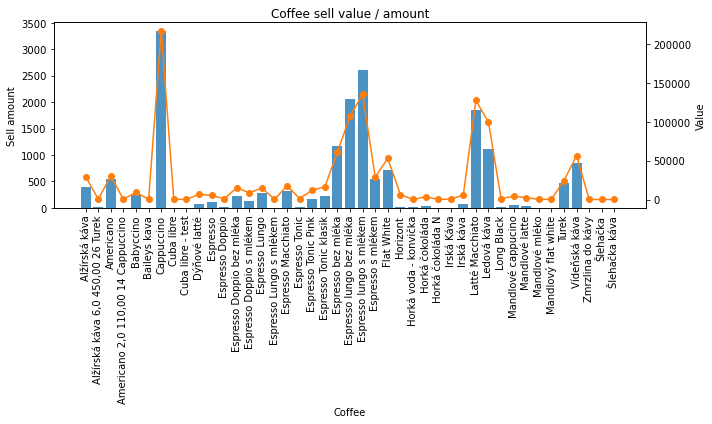

In [45]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(df_coffee['name'], df_coffee['amount_sum'], alpha=0.8)
ax1.set_ylabel('Sell amount')
ax1.set_xlabel('Coffee')
ax1.tick_params(axis="x", rotation=90)

ax2 = ax1.twinx()
ax2.plot(df_coffee['name'], df_coffee['value_sum'],color='tab:orange', marker='o')
ax2.set_ylabel('Value')


plt.title('Coffee sell value / amount')
plt.tight_layout()
plt.show()